# Synthetic data

Using this notebook, it is possible to reproduce the clustering results on the synthetic data from the paper [Stable and consistent density-based clustering](https://arxiv.org/abs/2005.09048).

In [1]:
import persistable
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

## Load data

The data comes from [the hdbscan GitHub repository](https://github.com/scikit-learn-contrib/hdbscan). This is a great test dataset, since it is quite challenging for most clustering algorithms, but easy to visualize.

In [2]:
from urllib.request import urlopen
from io import BytesIO

url = "https://github.com/scikit-learn-contrib/hdbscan/blob/4052692af994610adc9f72486a47c905dd527c94/notebooks/clusterable_data.npy?raw=true"
f = urlopen(url)
rf = f.read()
data = np.load(BytesIO(rf))

### Plot data

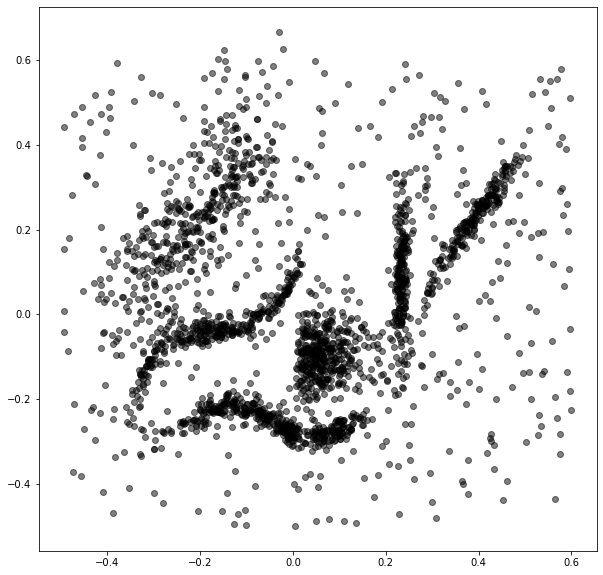

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0], data[:,1], alpha=0.5, c='k')

plt.show()

## Reproduce the instance of the Persistable interactive mode from the paper

### Basic usage of the Persistable interactive mode

- Run the cell below to open the graphical user interface.
- To see the Component Counting Function, click "Compute".
- To see the Prominence Vineyard, in the box "Interactive inputs selection", choose "Family of lines". Now, one sees the two chosen lines that determine the Prominence Vineyard. Next, click "Compute" under "Prominence Vineyard".
- To get a clustering, in the box "Parameter selection", choose "On".
- To re-create the clustering in the paper, select Line number 11 and Gap number 6. Then click "Choose parameter".
- To get the labels for this clustering, run the cell below the graphical user interface.

In [4]:
# to reproduce the instance of the Persistable interactive mode 
# from the paper, we load a state dictionary and pass it to start_ui

with open('synthetic-data-state.json', 'r') as fp:
    state = json.load(fp)

# create Persistable object
p = persistable.Persistable(data, n_neighbors='all')

# start UI
# set jupyter_mode='external' to serve the app in port
pi = persistable.PersistableInteractive(p)
port = pi.start_ui(ui_state=state, jupyter_mode='inline')

In [5]:
# get clustering with parameters chosen via the interactive mode
cluster_labels = pi.cluster()

### Plot clustering

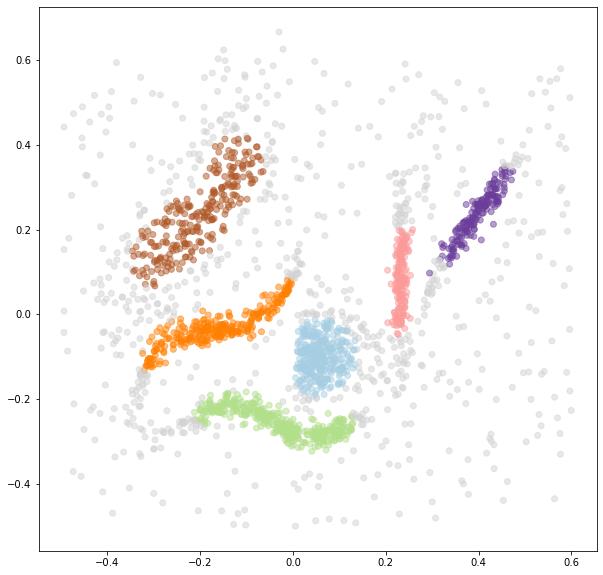

In [6]:
# choose color map
cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=np.amax(cluster_labels))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Paired')
noise_color = (211/255, 211/255, 211/255, 1) # light grey

# plot data with clusters indicated by colors
plt.figure(figsize=(10,10))
plt.scatter(data[:,0], data[:,1], c=[noise_color if x==-1 else scalarMap.to_rgba(x) for x in cluster_labels], alpha=0.5)

plt.show()